<a href="https://colab.research.google.com/github/Tauheed738/AcousticSenseAI/blob/main/DroneAudioDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/saraalemadi/DroneAudioDataset.git

Cloning into 'DroneAudioDataset'...
remote: Enumerating objects: 10649, done.
remote: Counting objects: 100% (6/6), done.
remote: Total 10649 (delta 5), reused 5 (delta 5), pack-reused 10643
Receiving objects: 100% (10649/10649), 274.31 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Checking out files: 100% (23409/23409), done.


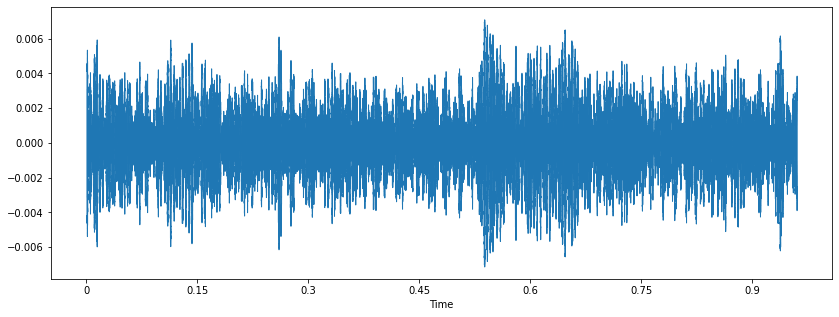

In [ ]:
##birds sound
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display


filename = '/content/DroneAudioDataset/Binary_Drone_Audio/unknown/1-12654-A-154.wav'

plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr = sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

# %%


22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [ ]:
wave_sample_rate


16000

In [ ]:
wave_audio

array([ 105,  130,  152, ..., -104, -118, -111], dtype=int16)

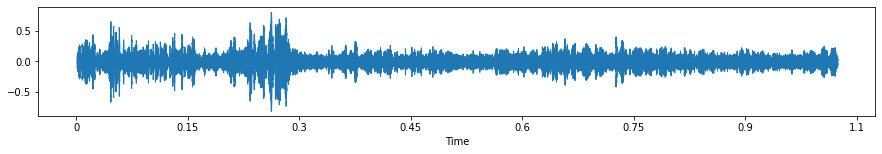

In [ ]:
filename = '/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/B_S2_D1_067-bebop_000_.wav'

plt.figure(figsize=(15,2))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr = sample_rate)
ipd.Audio(filename)

In [ ]:
librosa_audio_data,librosa_sample_rate = librosa.load(filename)
print(librosa_audio_data)

[ 0.01628039 -0.01099106 -0.01762283 ...  0.00874245 -0.01990765
  0.        ]


In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate
wave_audio

array([ 722, -823,  523, ..., 1245,  957, -666], dtype=int16)

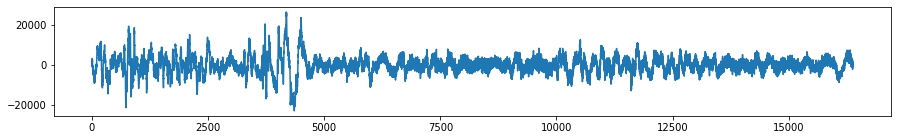

In [ ]:
plt.figure(figsize=(15,2))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate,n_mfcc=40 )
print(mfccs.shape)

(40, 45)


In [ ]:

mfccs

array([[-118.9782    , -104.98551   ,  -85.88229   , ..., -142.46011   ,
        -141.52283   , -141.39108   ],
       [ 136.7922    ,  148.32512   ,  165.93066   , ...,   69.246185  ,
          74.42696   ,   61.947727  ],
       [ -10.120483  ,  -13.496525  ,  -12.41315   , ...,  -65.38939   ,
         -61.41764   ,  -49.912323  ],
       ...,
       [   1.1805407 ,    4.234681  ,    5.869201  , ...,   10.943393  ,
           9.161277  ,   11.43321   ],
       [   7.054744  ,    3.396705  ,    5.986328  , ...,   -0.45947683,
          -2.25419   ,    0.46811205],
       [   1.8074961 ,   -1.4293237 ,    1.135102  , ...,    0.5103828 ,
          -2.62526   ,   -5.806752  ]], dtype=float32)

#main code

In [ ]:
import librosa
import os
import pandas as pd
import numpy as np
from tqdm import tqdm


In [ ]:
def features_extractor(file):
    audio,sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features  = librosa.feature.mfcc(y=audio,sr = sample_rate,n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_feature


In [ ]:
extracted_feature=[]
labels=[]

for i in os.listdir("/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/"):
  file=features_extractor(f"/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/{i}")
  extracted_feature.append([file," Drone Sound"])

for i in os.listdir("/content/DroneAudioDataset/Binary_Drone_Audio/unknown/"):
  file=features_extractor(f"/content/DroneAudioDataset/Binary_Drone_Audio/unknown/{i}")
  extracted_feature.append([file," not a Drone Sound"])

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=34
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1745
  warnings.warn(


In [ ]:
### Convertion extracted_feature in to pandas dataframe
extracted_feature_df = pd.DataFrame(extracted_feature,columns=['feature','class'])
extracted_feature_df.head(-10)

,feature,class
0,"[-122.66643, 92.93332, -79.90779, 86.78346, -3...",Drone Sound
1,"[-136.19417, 124.8035, -26.584986, 72.0451, -3...",Drone Sound
2,"[-286.17654, 54.346466, -80.57409, 98.343, -55...",Drone Sound
3,"[-290.98276, 72.68659, -66.39384, 83.46571, -4...",Drone Sound
4,"[-195.73767, 93.82117, -70.38968, 90.3058, -28...",Drone Sound
...,...,...
11689,"[-202.74681, 165.6783, -33.13864, 65.335464, -...",not a Drone Sound
11690,"[-324.4013, 180.85805, -38.860104, 48.575397, ...",not a Drone Sound
11691,"[-291.11295, 86.8471, -20.26112, 117.462265, -...",not a Drone Sound
11692,"[-165.37889, 119.36894, -89.14913, 80.62924, -...",not a Drone Sound


In [ ]:
extracted_feature_df.feature

0        [-122.66643, 92.93332, -79.90779, 86.78346, -3...
1        [-136.19417, 124.8035, -26.584986, 72.0451, -3...
2        [-286.17654, 54.346466, -80.57409, 98.343, -55...
3        [-290.98276, 72.68659, -66.39384, 83.46571, -4...
4        [-195.73767, 93.82117, -70.38968, 90.3058, -28...
                               ...                        
11699    [-105.79164, 185.66295, -67.80668, 58.820732, ...
11700    [-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
11701    [-295.8854, 134.91089, -25.698597, 49.106884, ...
11702    [-63.816227, 177.44675, -50.65725, 71.85924, -...
11703    [-123.35285, 180.38895, -37.02242, 47.49202, -...
Name: feature, Length: 11704, dtype: object

In [ ]:
extracted_feature_df.feature

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###split dataset into dependnt and independent dataset

X = np.array(extracted_feature_df['feature'].tolist())
Y = np.array(extracted_feature_df['class'].tolist())

In [ ]:
X.shape

(11704, 40)

In [ ]:
##label incoding

#Y=np.array(pd.get_dummies(Y))

In [ ]:
Y.shape

(11704,)

In [ ]:
Y

array([' Drone Sound', ' Drone Sound', ' Drone Sound', ...,
       ' not a Drone Sound', ' not a Drone Sound', ' not a Drone Sound'],
      dtype='<U18')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(Y)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
labelencoder.inverse_transform(y)

array([' Drone Sound', ' Drone Sound', ' Drone Sound', ...,
       ' not a Drone Sound', ' not a Drone Sound', ' not a Drone Sound'],
      dtype='<U18')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
X_train.shape

(9363, 40)

In [ ]:
X_test.shape

(2341, 40)

In [ ]:
Y_train.shape

(9363,)

In [ ]:
Y_train

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
Y_test.shape

(2341,)

In [ ]:
X_train

array([[-5.21203552e+02,  2.09188416e+02,  2.51572437e+01, ...,
         3.13233709e+00, -6.10340929e+00, -1.69056094e+00],
       [-8.50625992e+01,  1.33711304e+02, -1.08124893e+02, ...,
         1.67276525e+00,  1.61434066e+00,  2.66206336e+00],
       [-1.59304962e+02,  8.75389786e+01, -1.10335045e+02, ...,
         2.33199430e+00, -3.05301499e+00, -2.36259317e+00],
       ...,
       [-5.32907043e+02,  6.44849091e+01,  3.27790642e+01, ...,
         3.99298239e+00,  3.75661087e+00,  3.39853477e+00],
       [-6.24056946e+02,  1.36249298e+02, -7.68802719e+01, ...,
        -1.54426181e+00, -5.07941008e+00, -7.39556015e-01],
       [-3.94569366e+02,  1.17492882e+02, -6.43693161e+01, ...,
         2.21788383e+00,  4.00963388e-02,  3.93903637e+00]], dtype=float32)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
### No of classes
num_labels=1

In [ ]:
X_test[0].shape

(40,)

In [ ]:
Dense(1)

In [ ]:
model = Sequential()

##first layer

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

####second layer

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##third layer

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
model.compile(loss='BinaryCrossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
293/293 [==============================] - ETA: 0s - loss: 1.8604 - accuracy: 0.8849
Epoch 1: val_loss improved from inf to 0.22439, saving model to saved_models/audio_classification.hdf5
293/293 [==============================] - 4s 4ms/step - loss: 1.8604 - accuracy: 0.8849 - val_loss: 0.2244 - val_accuracy: 0.8915
Epoch 2/100
277/293 [===========================>..] - ETA: 0s - loss: 0.3207 - accuracy: 0.8831
Epoch 2: val_loss improved from 0.22439 to 0.17485, saving model to saved_models/audio_classification.hdf5
293/293 [==============================] - 1s 4ms/step - loss: 0.3116 - accuracy: 0.8849 - val_loss: 0.1748 - val_accuracy: 0.8915
Epoch 3/100
281/293 [===========================>..] - ETA: 0s - loss: 0.1667 - accuracy: 0.8856
Epoch 3: val_loss improved from 0.17485 to 0.14860, saving model to saved_models/audio_classification.hdf5
293/293 [==============================] - 1s 3ms/step - loss: 0.1704 - accuracy: 0.8849 - val_loss: 0.1486 - val_accuracy: 0.8915

In [ ]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.8914993405342102


# testing audio

1/1 [==============================] - 0s 100ms/step
 not a Drone Sound


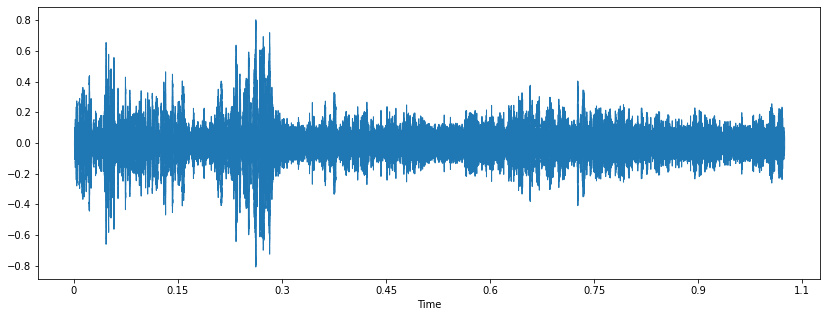

In [ ]:
filename="/content/DroneAudioDataset/Binary_Drone_Audio/yes_drone/B_S2_D1_067-bebop_000_.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
#print(int(predicted_label[0][0]))
print(labelencoder.inverse_transform([int(predicted_label[0][0])])[0])
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr = sample_rate)
ipd.Audio(filename)